In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torch.nn as nn

In [4]:
df = pd.read_csv('../../data/processed/LOLOracleData_ChampStats.csv')

In [5]:
df.head()

,BTop,BTopWr,BToptags,BTophp,BTophpperlevel,BTopmovespeed,BToparmor,BToparmorperlevel,BTopspellblock,BTopspellblockperlevel,...,RSupspellblock,RSupspellblockperlevel,RSupattackrange,RSuphpregen,RSuphpregenperlevel,RSupattackdamage,RSupattackdamageperlevel,RSupattackspeedperlevel,RSupattackspeed,Winner
0,Camille,0.524364,Diver,575.6,85,340,35.0,3.8,32.1,1.25,...,30.0,0.50,525,5.5,0.55,53.5440,3.3000,2.300,0.625,1
1,Camille,0.524364,Diver,575.6,85,340,35.0,3.8,32.1,1.25,...,30.0,0.50,525,5.5,0.55,54.9379,3.1416,1.360,0.625,0
2,Irelia,0.513399,Diver,580.0,95,335,36.0,3.0,32.0,1.25,...,32.1,1.25,125,5.0,0.75,63.5400,3.3000,2.125,0.800,0
3,Graves,0.511305,Specialist,555.0,92,340,33.0,3.4,32.0,1.25,...,32.0,1.25,150,7.0,0.50,62.0000,2.0000,2.500,0.667,1
4,Camille,0.524364,Diver,575.6,85,340,35.0,3.8,32.1,1.25,...,28.0,1.25,175,10.0,0.65,64.0000,3.3000,2.950,0.644,1


In [6]:
print(df.columns)

Index(['BTop', 'BTopWr', 'BToptags', 'BTophp', 'BTophpperlevel',
       'BTopmovespeed', 'BToparmor', 'BToparmorperlevel', 'BTopspellblock',
       'BTopspellblockperlevel',
       ...
       'RSupspellblock', 'RSupspellblockperlevel', 'RSupattackrange',
       'RSuphpregen', 'RSuphpregenperlevel', 'RSupattackdamage',
       'RSupattackdamageperlevel', 'RSupattackspeedperlevel',
       'RSupattackspeed', 'Winner'],
      dtype='object', length=171)


In [7]:
Blue = ['BTophpperlevel','BToparmorperlevel','BTopspellblock',
 'BTopspellblockperlevel','BTophpregenperlevel','BTopattackdamageperlevel','BTopattackspeedperlevel',
 'BJnghpperlevel','BJngarmorperlevel','BJngspellblock',
 'BJngspellblockperlevel','BJnghpregenperlevel','BJngattackdamageperlevel','BJngattackspeedperlevel',
 'BMidhpperlevel','BMidarmorperlevel','BMidspellblock',
 'BMidspellblockperlevel','BMidhpregenperlevel','BMidattackdamageperlevel','BMidattackspeedperlevel',
 'BAdchpperlevel','BAdcarmorperlevel','BAdcspellblock',
 'BAdcspellblockperlevel','BAdchpregenperlevel','BAdcattackdamageperlevel','BAdcattackspeedperlevel',
 'BSuphpperlevel','BSuparmorperlevel','BSupspellblock',
 'BSupspellblockperlevel','BSuphpregenperlevel','BSupattackdamageperlevel','BSupattackspeedperlevel']

In [8]:
# Blue

In [12]:
Red = ['R'+blue[1:] for blue in Blue]

In [13]:
# Red

In [14]:
df.drop(Blue,axis=1,inplace=True)

In [15]:
df.head()

,BTop,BTopWr,BToptags,BTophp,BTopmovespeed,BToparmor,BTopattackrange,BTophpregen,BTopattackdamage,BTopattackspeed,...,RSupspellblock,RSupspellblockperlevel,RSupattackrange,RSuphpregen,RSuphpregenperlevel,RSupattackdamage,RSupattackdamageperlevel,RSupattackspeedperlevel,RSupattackspeed,Winner
0,Camille,0.524364,Diver,575.6,340,35.0,125,8.5,68.0,0.644,...,30.0,0.50,525,5.5,0.55,53.5440,3.3000,2.300,0.625,1
1,Camille,0.524364,Diver,575.6,340,35.0,125,8.5,68.0,0.644,...,30.0,0.50,525,5.5,0.55,54.9379,3.1416,1.360,0.625,0
2,Irelia,0.513399,Diver,580.0,335,36.0,200,8.5,65.0,0.656,...,32.1,1.25,125,5.0,0.75,63.5400,3.3000,2.125,0.800,0
3,Graves,0.511305,Specialist,555.0,340,33.0,425,8.0,68.0,0.475,...,32.0,1.25,150,7.0,0.50,62.0000,2.0000,2.500,0.667,1
4,Camille,0.524364,Diver,575.6,340,35.0,125,8.5,68.0,0.644,...,28.0,1.25,175,10.0,0.65,64.0000,3.3000,2.950,0.644,1


In [16]:
df.drop(Red,axis=1,inplace=True)

In [17]:
df.head()

,BTop,BTopWr,BToptags,BTophp,BTopmovespeed,BToparmor,BTopattackrange,BTophpregen,BTopattackdamage,BTopattackspeed,...,RSupWr,RSuptags,RSuphp,RSupmovespeed,RSuparmor,RSupattackrange,RSuphpregen,RSupattackdamage,RSupattackspeed,Winner
0,Camille,0.524364,Diver,575.6,340,35.0,125,8.5,68.0,0.644,...,0.492260,Enchanter,534.0,335,26.00,525,5.5,53.5440,0.625,1
1,Camille,0.524364,Diver,575.6,340,35.0,125,8.5,68.0,0.644,...,0.440678,Artillery,520.0,340,21.88,525,5.5,54.9379,0.625,0
2,Irelia,0.513399,Diver,580.0,335,36.0,200,8.5,65.0,0.656,...,0.527418,Vanguard,565.0,335,39.00,125,5.0,63.5400,0.800,0
3,Graves,0.511305,Specialist,555.0,340,33.0,425,8.0,68.0,0.475,...,0.492582,Assassin,600.0,330,45.00,150,7.0,62.0000,0.667,1
4,Camille,0.524364,Diver,575.6,340,35.0,125,8.5,68.0,0.644,...,0.473513,Diver,580.0,345,40.00,175,10.0,64.0000,0.644,1


In [18]:
role = ['BTop','BJng','BMid','BAdc','BSup','RTop','RJng','RMid','RAdc','RSup']
df.drop(role,axis=1,inplace=True)

In [19]:
df.head()

,BTopWr,BToptags,BTophp,BTopmovespeed,BToparmor,BTopattackrange,BTophpregen,BTopattackdamage,BTopattackspeed,BJngWr,...,RSupWr,RSuptags,RSuphp,RSupmovespeed,RSuparmor,RSupattackrange,RSuphpregen,RSupattackdamage,RSupattackspeed,Winner
0,0.524364,Diver,575.6,340,35.0,125,8.5,68.0,0.644,0.506967,...,0.492260,Enchanter,534.0,335,26.00,525,5.5,53.5440,0.625,1
1,0.524364,Diver,575.6,340,35.0,125,8.5,68.0,0.644,0.504318,...,0.440678,Artillery,520.0,340,21.88,525,5.5,54.9379,0.625,0
2,0.513399,Diver,580.0,335,36.0,200,8.5,65.0,0.656,0.486450,...,0.527418,Vanguard,565.0,335,39.00,125,5.0,63.5400,0.800,0
3,0.511305,Specialist,555.0,340,33.0,425,8.0,68.0,0.475,0.505097,...,0.492582,Assassin,600.0,330,45.00,150,7.0,62.0000,0.667,1
4,0.524364,Diver,575.6,340,35.0,125,8.5,68.0,0.644,0.509764,...,0.473513,Diver,580.0,345,40.00,175,10.0,64.0000,0.644,1


In [20]:
df['Winner'].value_counts()

0    9920
1    9759
Name: Winner, dtype: int64

In [21]:
cat_cols = ['BToptags','BJngtags','BMidtags','BAdctags','BSuptags','RToptags','RJngtags','RMidtags','RAdctags','RSuptags']

In [22]:
cont_cols = list(df.columns)

for i in cont_cols:
    if i in cat_cols:
        cont_cols.remove(i)

In [23]:
cont_cols.remove('Winner')

In [24]:
len(cont_cols)

80

In [25]:
len(df.columns)

91

In [26]:
len(cat_cols)

10

In [27]:
df.dtypes

BTopWr              float64
BToptags             object
BTophp              float64
BTopmovespeed         int64
BToparmor           float64
                     ...   
RSupattackrange       int64
RSuphpregen         float64
RSupattackdamage    float64
RSupattackspeed     float64
Winner                int64
Length: 91, dtype: object

In [28]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [29]:
df.dtypes

BTopWr               float64
BToptags            category
BTophp               float64
BTopmovespeed          int64
BToparmor            float64
                      ...   
RSupattackrange        int64
RSuphpregen          float64
RSupattackdamage     float64
RSupattackspeed      float64
Winner                 int64
Length: 91, dtype: object

In [30]:
df['BToptags'].head()

0         Diver
1         Diver
2         Diver
3    Specialist
4         Diver
Name: BToptags, dtype: category
Categories (13, object): ['Artillery', 'Assassin', 'Battlemage', 'Burst', ..., 'Skirmisher', 'Specialist', 'Vanguard', 'Warden']

In [31]:
df['BToptags'].cat.categories

Index(['Artillery', 'Assassin', 'Battlemage', 'Burst', 'Catcher', 'Diver',
       'Enchanter', 'Juggernaut', 'Marksman', 'Skirmisher', 'Specialist',
       'Vanguard', 'Warden'],
      dtype='object')

In [32]:
df['BToptags'].cat.codes

0         5
1         5
2         5
3        10
4         5
         ..
19674     0
19675     8
19676     8
19677     2
19678     5
Length: 19679, dtype: int8

In [33]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [34]:
cats

array([[ 5, 11,  9, ...,  3,  8,  6],
       [ 5, 10, 12, ...,  0,  8,  0],
       [ 5,  1,  3, ...,  3,  8, 11],
       ...,
       [ 8, 10,  5, ...,  8,  8, 12],
       [ 2,  7,  3, ...,  2,  8,  4],
       [ 5,  5,  3, ..., 12,  8,  4]], dtype=int8)

In [35]:
cats.shape

(19679, 10)

In [36]:
cats = torch.tensor(cats, dtype=torch.int64)

In [37]:
cats

tensor([[ 5, 11,  9,  ...,  3,  8,  6],
        [ 5, 10, 12,  ...,  0,  8,  0],
        [ 5,  1,  3,  ...,  3,  8, 11],
        ...,
        [ 8, 10,  5,  ...,  8,  8, 12],
        [ 2,  7,  3,  ...,  2,  8,  4],
        [ 5,  5,  3,  ..., 12,  8,  4]])

In [38]:
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)

In [39]:
conts

tensor([[5.2436e-01, 5.7560e+02, 3.4000e+02,  ..., 5.5000e+00, 5.3544e+01,
         6.2500e-01],
        [5.2436e-01, 5.7560e+02, 3.4000e+02,  ..., 5.5000e+00, 5.4938e+01,
         6.2500e-01],
        [5.1340e-01, 5.8000e+02, 3.3500e+02,  ..., 5.0000e+00, 6.3540e+01,
         8.0000e-01],
        ...,
        [4.9311e-01, 5.5900e+02, 3.2500e+02,  ..., 8.5000e+00, 5.5376e+01,
         6.4400e-01],
        [4.7015e-01, 5.3700e+02, 3.3000e+02,  ..., 7.0000e+00, 5.6000e+01,
         6.2500e-01],
        [5.2436e-01, 5.7560e+02, 3.4000e+02,  ..., 5.0000e+00, 6.2000e+01,
         6.3500e-01]])

In [40]:
conts.shape

torch.Size([19679, 80])

In [41]:
conts.type()

'torch.FloatTensor'

In [42]:
y_col = ['Winner']

In [43]:
y = torch.tensor(df[y_col].values).flatten()

#Note: the CrossEntropyLoss function expects a 1d y-tensor, so we end up using .flatten()

In [44]:
y

tensor([1, 0, 0,  ..., 0, 0, 1])

In [45]:
cats.shape

torch.Size([19679, 10])

In [46]:
conts.shape

torch.Size([19679, 80])

In [47]:
y.shape

torch.Size([19679])

In [48]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(13, 7),
 (13, 7),
 (13, 7),
 (13, 7),
 (13, 7),
 (13, 7),
 (12, 6),
 (13, 7),
 (13, 7),
 (13, 7)]

In [49]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [50]:
model = TabularModel(emb_szs, conts.shape[1], 2, [300, 400, 350,240,200,160,140,120,130], p=0.4) # out_sz = 2

In [51]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(13, 7)
    (1): Embedding(13, 7)
    (2): Embedding(13, 7)
    (3): Embedding(13, 7)
    (4): Embedding(13, 7)
    (5): Embedding(13, 7)
    (6): Embedding(12, 6)
    (7): Embedding(13, 7)
    (8): Embedding(13, 7)
    (9): Embedding(13, 7)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=149, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=300, out_features=400, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=400, out_features=350, bias=True)
    (9): ReLU(inplace=True)
    (10):

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)

In [53]:
batch_size = 10000
test_size = 5000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [54]:
len(cat_train)

5000

In [55]:
len(cat_test)

5000

In [63]:
import time
start_time = time.time()

epochs = 250
losses = []

for i in range(epochs):
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    # a neat trick to save screen space:
    if i%25 == 0:
        print(f'epoch: {i+1:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i+1:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.69687033
epoch:  26  loss: 0.69641423
epoch:  51  loss: 0.69383472
epoch:  76  loss: 0.69522208
epoch: 101  loss: 0.69569945
epoch: 126  loss: 0.69283485
epoch: 151  loss: 0.69290656
epoch: 176  loss: 0.69304121
epoch: 201  loss: 0.69210136
epoch: 226  loss: 0.69215494
epoch: 250  loss: 0.69090968

Duration: 101 seconds


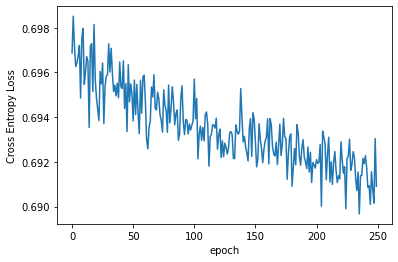

In [64]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [65]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.69324577


In [66]:
rows = 500
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')


MODEL OUTPUT               ARGMAX  Y_TEST
tensor([-0.1598, -0.0553])    1      0   
tensor([0.5231, 0.4631])      0      1   
tensor([0.8051, 0.7683])      0      1   
tensor([-0.2344, -0.3166])    0      1   
tensor([-0.4788, -0.5343])    0      1   
tensor([-0.1386,  0.1445])    1      0   
tensor([-0.3393, -0.5205])    0      0   
tensor([-1.0562, -0.9465])    1      1   
tensor([-0.1179, -0.2499])    0      1   
tensor([ 0.0052, -0.1102])    0      1   
tensor([0.6718, 0.7749])      1      0   
tensor([-0.1983, -0.3781])    0      1   
tensor([0.7433, 0.7301])      0      0   
tensor([0.8364, 0.7954])      0      0   
tensor([-1.2260, -1.2426])    0      1   
tensor([-0.1222, -0.2026])    0      0   
tensor([0.3430, 0.3367])      0      1   
tensor([0.1350, 0.0744])      0      1   
tensor([-0.0483,  0.1144])    1      1   
tensor([-0.7249, -0.6064])    1      1   
tensor([0.4541, 0.4416])      0      1   
tensor([-0.0318, -0.2365])    0      1   
tensor([-1.4867, -1.4426])    1   

In [67]:
y_pred = []

for i in range(len(y_val)):
    a = y_val[i].argmax().item()
    y_pred.append(a)

In [68]:
len(y_pred)

5000

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_pred,y_test))
print('\n')
print(classification_report(y_pred,y_test))

[[1805 1820]
 [ 624  751]]


              precision    recall  f1-score   support

           0       0.74      0.50      0.60      3625
           1       0.29      0.55      0.38      1375

    accuracy                           0.51      5000
   macro avg       0.52      0.52      0.49      5000
weighted avg       0.62      0.51      0.54      5000

